In [1]:
#Imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Getting the dataset
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git ../data/raw/clothing-dataset-small/

Cloning into '../data/raw/clothing-dataset-small'...
Updating files:  12% (469/3783)
Updating files:  13% (492/3783)
Updating files:  14% (530/3783)
Updating files:  15% (568/3783)
Updating files:  16% (606/3783)
Updating files:  17% (644/3783)
Updating files:  18% (681/3783)
Updating files:  19% (719/3783)
Updating files:  20% (757/3783)
Updating files:  21% (795/3783)
Updating files:  22% (833/3783)
Updating files:  23% (871/3783)
Updating files:  23% (902/3783)
Updating files:  24% (908/3783)
Updating files:  25% (946/3783)
Updating files:  26% (984/3783)
Updating files:  27% (1022/3783)
Updating files:  28% (1060/3783)
Updating files:  29% (1098/3783)
Updating files:  29% (1112/3783)
Updating files:  30% (1135/3783)
Updating files:  31% (1173/3783)
Updating files:  32% (1211/3783)
Updating files:  33% (1249/3783)
Updating files:  34% (1287/3783)
Updating files:  35% (1325/3783)
Updating files:  36% (1362/3783)
Updating files:  37% (1400/3783)
Updating files:  38% (1438/3783)
Updati

In [3]:
train_path = '../data/raw/clothing-dataset-small/train/'
val_path = '../data/raw/clothing-dataset-small/validation/'
test_path = '../data/raw/clothing-dataset-small/test/'

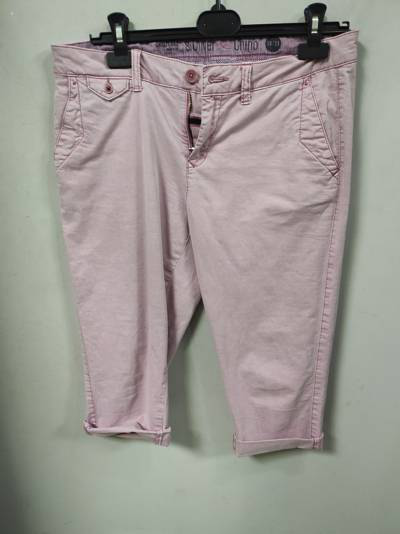

In [4]:
import glob
from PIL import Image
import random
clothing_list = glob.glob('../data/raw/clothing-dataset-small/train/**/*.*', recursive=True)
Image.open(random.choice(clothing_list))

In [12]:
!pip install deepfeatx

  Using cached deepfeatx-0.1.0b0-py3-none-any.whl (17 kB)
  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
Processing c:\users\victor_1\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73\wrapt-1.12.1-py3-none-any.whl
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acesso negado: 'c:\\programdata\\anaconda3\\lib\\site-packages\\h5py-2.10.0.dist-info\\AUTHORS'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:


In [13]:
from deepfeatx.image import ImageFeatureExtractor

ModuleNotFoundError: No module named 'deepfeatx'

In [14]:
fe = ImageFeatureExtractor()

NameError: name 'ImageFeatureExtractor' is not defined

In [15]:
df = fe.extract_features_from_directory(train_path,
                                   classes_as_folders=True,
                                   export_class_names=True)

NameError: name 'fe' is not defined

In [16]:
val = fe.extract_features_from_directory(val_path,
                                   classes_as_folders=True,
                                   export_class_names=True)

NameError: name 'fe' is not defined

In [ ]:
test = fe.extract_features_from_directory(test_path,
                                   classes_as_folders=True,
                                   export_class_names=True)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
X_train = df.drop(['filepaths', 'classes'], axis=1)
y_train = df['classes']

In [ ]:
X_val = val.drop(['filepaths', 'classes'], axis=1)
y_val = val['classes']

In [ ]:
X_test = test.drop(['filepaths', 'classes'], axis=1)
y_test = test['classes']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000, random_state=42)
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
directory = '../models'
if not os.path.exists(directory):
    os.makedirs(directory)
import pickle
pickle.dump(lr, open('../models/logistic_regression.pkl', 'wb'))

In [ ]:
import pickle
model = pickle.load(open('../models/logistic_regression.pkl', 'rb'))

In [ ]:
model.classes_

In [ ]:
import gradio as gr
from PIL import Image
def recognize_clothing(img):
    #img=Image.fromarray(img)
    vector = fe.img_to_vector(img)
    label = lr.predict(vector)
    confidence = lr.predict_proba(vector)
    return label[0], confidence[0]

In [ ]:
clothing_list = glob.glob('./clothing-dataset-small/train/**/*.*', recursive=True)
img=Image.open(random.choice(clothing_list))
img

In [ ]:
vector = fe.img_to_vector(img)

In [ ]:
recognize_clothing(img)

In [ ]:
gr.Interface(fn=recognize_clothing, inputs="image", outputs="text").launch(debug=True)